# Modeling - Predicting the Difficulty

In [ ]:
import pandas as pd
from pycaret.regression import *

In [ ]:
df = pd.read_csv('../Data/modeling_dataset.csv')
df.head()

,difficulty_estimate,duration,avg_output,avg_cadence,avg_resistance,avg_speed,total_calories,avg_heart,date_only,percent_leaderboard_rank,body_mass
0,8.0258,60,89.0,85.0,35.0,15.3,702,159.0,2021-05-20,11.332252,NaN
1,8.2692,45,88.0,87.0,33.0,14.7,531,160.0,2021-05-19,12.349509,NaN
2,6.1463,30,77.0,87.0,32.0,14.5,353,160.0,2021-05-18,12.510019,191.8
3,7.2753,60,84.0,85.0,34.0,15.0,743,165.0,2021-05-16,11.474473,190.6
4,6.5793,45,82.0,82.0,35.0,14.9,481,150.0,2021-05-13,11.867078,190.4


In [ ]:
df.shape

(328, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   difficulty_estimate       328 non-null    float64
 1   duration                  328 non-null    int64  
 2   avg_output                327 non-null    float64
 3   avg_cadence               327 non-null    float64
 4   avg_resistance            327 non-null    float64
 5   avg_speed                 327 non-null    float64
 6   total_calories            328 non-null    int64  
 7   avg_heart                 328 non-null    float64
 8   date_only                 328 non-null    object 
 9   percent_leaderboard_rank  326 non-null    float64
 10  body_mass                 149 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 28.3+ KB


In [ ]:
df.columns

Index(['difficulty_estimate', 'duration', 'avg_output', 'avg_cadence',
       'avg_resistance', 'avg_speed', 'total_calories', 'avg_heart',
       'date_only', 'percent_leaderboard_rank', 'body_mass'],
      dtype='object')

In [ ]:
# initialize setup
#using defaults for numeric imputation, scaling
#ignoring the date and body mass
#normalizing the data for better performance
#using minmax normalization between 0 and 1
#removing highly correlated features with default threashold of l9
s = setup(data = df, target = 'difficulty_estimate', categorical_features=None, ignore_features = ['date_only', 'body_mass',], 
          numeric_features=['duration', 'avg_resistance'], normalize=True, normalize_method="minmax", 
          remove_multicollinearity=True, session_id=123, log_plots=True, log_data=True, log_profile=True)

,Description,Value
0,session_id,123
1,Target,difficulty_estimate
2,Original Data,"(328, 11)"
3,Missing Values,True
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(229, 6)"


In [ ]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.5072,0.3912,0.6204,0.6624,0.0784,0.0731,0.1500
et,Extra Trees Regressor,0.5077,0.4045,0.6282,0.6446,0.0790,0.0731,0.1320
ada,AdaBoost Regressor,0.5542,0.4410,0.6589,0.6174,0.0842,0.0812,0.0430
gbr,Gradient Boosting Regressor,0.5352,0.4391,0.6587,0.6163,0.0834,0.0770,0.0350
br,Bayesian Ridge,0.5301,0.4594,0.6711,0.6107,0.0862,0.0776,0.0160
lr,Linear Regression,0.5299,0.4663,0.6749,0.6065,0.0866,0.0776,0.0170
lar,Least Angle Regression,0.5299,0.4663,0.6749,0.6065,0.0866,0.0776,0.0080
lightgbm,Light Gradient Boosting Machine,0.5446,0.4542,0.6717,0.6056,0.0848,0.0787,0.0340
huber,Huber Regressor,0.5359,0.4857,0.6859,0.5937,0.0880,0.0785,0.0250
knn,K Neighbors Regressor,0.5981,0.5449,0.7340,0.5366,0.0927,0.0864,0.0340


In [ ]:
et= create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4082,0.2797,0.5289,0.7989,0.0670,0.0616
1,0.6501,0.5114,0.7151,0.6039,0.0890,0.0945
2,0.6065,0.5668,0.7529,0.6475,0.1021,0.0956
3,0.3362,0.1918,0.4379,0.8589,0.0514,0.0462
4,0.4829,0.3381,0.5814,0.6729,0.0735,0.0700
5,0.5197,0.6132,0.7831,0.2448,0.0903,0.0673
6,0.4887,0.3614,0.6012,0.6787,0.0744,0.0693
7,0.5438,0.4354,0.6598,0.5915,0.0933,0.0851
8,0.5241,0.3798,0.6163,0.7368,0.0736,0.0700
9,0.5163,0.3671,0.6059,0.6123,0.0756,0.0715


In [ ]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5662,0.4499,0.6707,0.6766,0.0936,0.0914
1,0.6442,0.6011,0.7753,0.5345,0.1005,0.0960
2,0.6864,0.7119,0.8438,0.5573,0.1179,0.1111
3,0.5480,0.4731,0.6878,0.6519,0.0865,0.0799
4,0.4558,0.3042,0.5515,0.7057,0.0756,0.0701
5,0.5504,0.5265,0.7256,0.3517,0.0833,0.0721
6,0.5462,0.4240,0.6512,0.6231,0.0833,0.0810
7,0.6149,0.5806,0.7620,0.4552,0.1054,0.0949
8,0.7664,0.8298,0.9110,0.4248,0.1058,0.1007
9,0.5174,0.4187,0.6471,0.5578,0.0744,0.0678


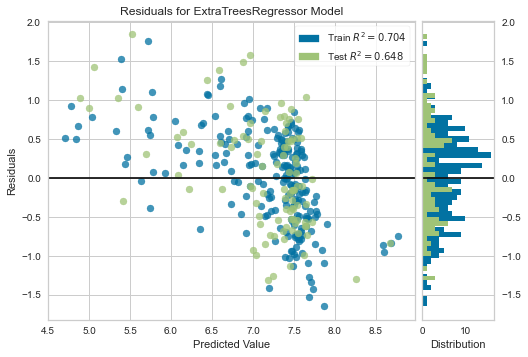

In [ ]:
plot_model(tuned_et)

seems to exhibit “heteroscedasticity,” in that it predicts higher difficulties more accurately than lower difficulties as evidenced by a tighter cluster around the higher difficulty levels.

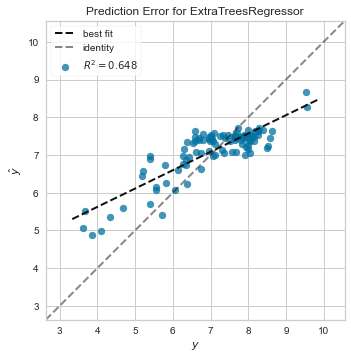

In [ ]:
plot_model(tuned_et, "error")

In [ ]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# Retry with different normalization method - zscore
# initialize setup

s = setup(data = df, target = 'difficulty_estimate', categorical_features=None, ignore_features = ['date_only', 'body_mass',], 
          numeric_features=['duration', 'avg_resistance'], normalize=True, 
          remove_multicollinearity=True, session_id=123, log_plots=True, log_data=True, log_profile=True)

,Description,Value
0,session_id,123
1,Target,difficulty_estimate
2,Original Data,"(328, 11)"
3,Missing Values,True
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(229, 6)"


In [ ]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.5078,0.3912,0.6203,0.6624,0.0783,0.0731,0.1120
et,Extra Trees Regressor,0.5077,0.4045,0.6282,0.6446,0.0790,0.0731,0.1230
ada,AdaBoost Regressor,0.5535,0.4363,0.6557,0.6229,0.0826,0.0806,0.0420
gbr,Gradient Boosting Regressor,0.5361,0.4400,0.6594,0.6153,0.0835,0.0771,0.0320
ridge,Ridge Regression,0.5287,0.4565,0.6693,0.6126,0.0860,0.0774,0.0100
br,Bayesian Ridge,0.5299,0.4593,0.6710,0.6108,0.0862,0.0776,0.0100
lr,Linear Regression,0.5299,0.4663,0.6749,0.6065,0.0866,0.0776,0.3940
lar,Least Angle Regression,0.5299,0.4663,0.6749,0.6065,0.0866,0.0776,0.0060
lightgbm,Light Gradient Boosting Machine,0.5438,0.4587,0.6740,0.6025,0.0848,0.0785,0.0280
huber,Huber Regressor,0.5359,0.4858,0.6859,0.5936,0.0880,0.0785,0.0090


In [ ]:
et2 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4082,0.2797,0.5289,0.7989,0.0670,0.0616
1,0.6501,0.5114,0.7151,0.6039,0.0890,0.0945
2,0.6065,0.5668,0.7529,0.6475,0.1021,0.0956
3,0.3362,0.1918,0.4379,0.8589,0.0514,0.0462
4,0.4829,0.3381,0.5814,0.6729,0.0735,0.0700
5,0.5197,0.6132,0.7831,0.2448,0.0903,0.0673
6,0.4887,0.3614,0.6012,0.6787,0.0744,0.0693
7,0.5438,0.4354,0.6598,0.5915,0.0933,0.0851
8,0.5241,0.3798,0.6163,0.7368,0.0736,0.0700
9,0.5163,0.3671,0.6059,0.6123,0.0756,0.0715


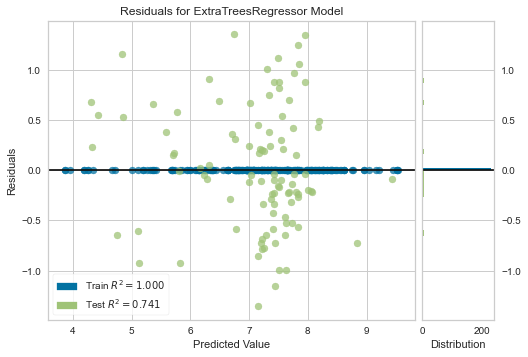

In [ ]:
#not going to tune this time
plot_model(et2)
#not tuning leads to a high overfit training set

In [ ]:
tuned_et2 = tune_model(et2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5662,0.4499,0.6707,0.6766,0.0936,0.0914
1,0.6442,0.6011,0.7753,0.5345,0.1005,0.0960
2,0.6864,0.7119,0.8438,0.5573,0.1179,0.1111
3,0.5480,0.4731,0.6878,0.6519,0.0865,0.0799
4,0.4558,0.3042,0.5515,0.7057,0.0756,0.0701
5,0.5504,0.5265,0.7256,0.3517,0.0833,0.0721
6,0.5462,0.4240,0.6512,0.6231,0.0833,0.0810
7,0.6149,0.5806,0.7620,0.4552,0.1054,0.0949
8,0.7664,0.8298,0.9110,0.4248,0.1058,0.1007
9,0.5174,0.4187,0.6471,0.5578,0.0744,0.0678


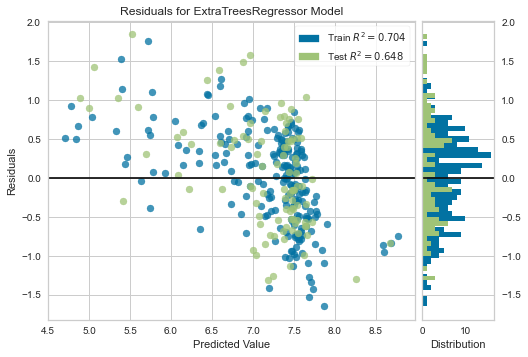

In [ ]:
plot_model(tuned_et2)

In [ ]:
#same result.  Going to try to increase the multicollinearity threshold and remove perfect collinearity.  adding feature selection
s = setup(data = df, target = 'difficulty_estimate', categorical_features=None, ignore_features = ['date_only', 'body_mass',], 
          numeric_features=['duration', 'avg_resistance'], normalize=True, normalize_method="minmax", 
          remove_multicollinearity=True, multicollinearity_threshold=.75, remove_perfect_collinearity=True,
          feature_selection=True, session_id=123, log_plots=True, log_data=True, log_profile=True)

,Description,Value
0,session_id,123
1,Target,difficulty_estimate
2,Original Data,"(328, 11)"
3,Missing Values,True
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(229, 5)"


In [ ]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.5189,0.3894,0.6197,0.6374,0.0757,0.0734,0.0160
ada,AdaBoost Regressor,0.5319,0.4110,0.6325,0.6250,0.0787,0.0766,0.0120
et,Extra Trees Regressor,0.5084,0.4001,0.6241,0.6247,0.0750,0.0707,0.0830
rf,Random Forest Regressor,0.5177,0.4136,0.6362,0.6116,0.0765,0.0719,0.0950
lightgbm,Light Gradient Boosting Machine,0.5442,0.4482,0.6568,0.6005,0.0805,0.0770,0.0080
gbr,Gradient Boosting Regressor,0.5522,0.4447,0.6625,0.5694,0.0804,0.0774,0.0080
br,Bayesian Ridge,0.5546,0.4646,0.6784,0.5635,0.0842,0.0790,0.0070
ridge,Ridge Regression,0.5658,0.4724,0.6846,0.5631,0.0861,0.0816,0.0050
lr,Linear Regression,0.5537,0.4657,0.6789,0.5616,0.0842,0.0787,0.0050
lar,Least Angle Regression,0.5537,0.4657,0.6789,0.5616,0.0842,0.0787,0.0050


In [ ]:
#blend top 3 models
knn = create_model('knn')
et = create_model('et')
blender_specific = blend_models(estimator_list = [knn,et])

# train a voting regressor dynamically
blender_top5 = blend_models(compare_models(n_select = 5))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4197,0.2804,0.5295,0.7984,0.0686,0.0645
1,0.6158,0.5103,0.7143,0.6048,0.0909,0.0916
2,0.5240,0.3950,0.6285,0.7544,0.0838,0.0802
3,0.4252,0.2989,0.5467,0.7801,0.0659,0.0593
4,0.4123,0.2641,0.5139,0.7445,0.0662,0.0602
5,0.5000,0.4829,0.6949,0.4053,0.0794,0.0654
6,0.4886,0.3377,0.5811,0.6998,0.0731,0.0701
7,0.5272,0.4526,0.6728,0.5753,0.0931,0.0816
8,0.5613,0.4405,0.6637,0.6947,0.0798,0.0768
9,0.5495,0.4113,0.6413,0.5656,0.0783,0.0750


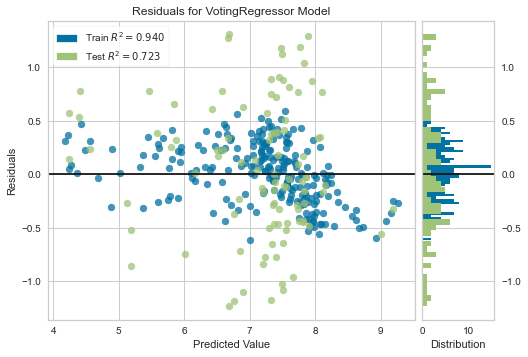

In [ ]:
plot_model(blender_top5)
#seems slightly better with higher r squared for both training and testing set

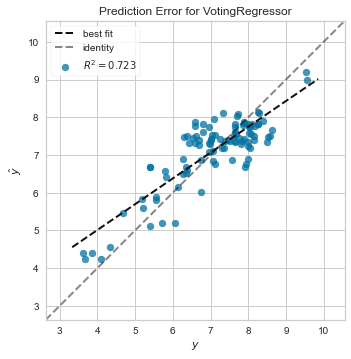

In [ ]:
plot_model(blender_top5, "error")

In [ ]:
tuned_blend = tune_model(blender_top5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4284,0.2770,0.5263,0.8009,0.0691,0.0668
1,0.6096,0.5038,0.7098,0.6099,0.0909,0.0911
2,0.5360,0.4105,0.6407,0.7447,0.0860,0.0827
3,0.4227,0.2955,0.5436,0.7826,0.0659,0.0591
4,0.4089,0.2444,0.4944,0.7635,0.0637,0.0598
5,0.4993,0.4787,0.6919,0.4104,0.0792,0.0657
6,0.4923,0.3300,0.5745,0.7066,0.0722,0.0708
7,0.5356,0.4581,0.6769,0.5701,0.0940,0.0831
8,0.5892,0.4738,0.6883,0.6716,0.0823,0.0799
9,0.5424,0.3945,0.6281,0.5833,0.0764,0.0742


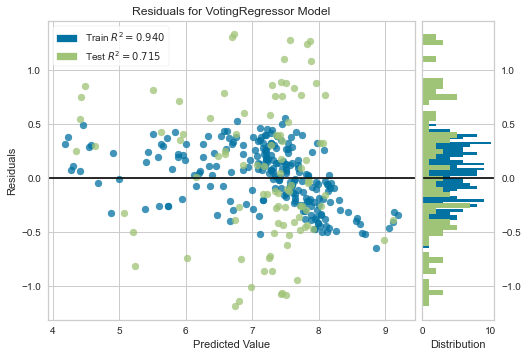

In [ ]:
plot_model(tuned_blend)

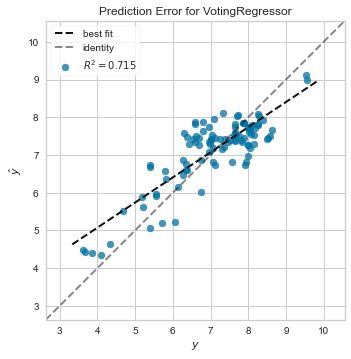

In [ ]:
plot_model(tuned_blend, "error")

In [ ]:
evaluate_model(tuned_blend)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_blend)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.5291,0.4028,0.6346,0.7152,0.0818,0.0794


,percent_leaderboard_rank,avg_output,duration,avg_cadence,avg_heart,difficulty_estimate,Label
0,0.169109,0.546154,0.538462,0.804348,0.684932,6.9721,7.737557
1,0.272332,0.638462,0.538462,0.956522,0.630137,8.5873,7.505866
2,0.097169,0.369231,0.307692,0.934783,0.424658,5.1838,5.892794
3,0.190465,0.600000,0.538462,0.826087,0.726027,7.6462,7.736956
4,0.183823,0.323077,0.538462,0.717391,0.506849,5.1966,5.622102
...,...,...,...,...,...,...,...
94,0.152598,0.330769,0.538462,0.065217,0.712329,7.3138,7.163482
95,0.067904,0.300000,0.307692,0.652174,0.632034,7.6764,7.555866
96,0.239666,0.638462,0.538462,0.760870,0.712329,7.6372,7.358637
97,0.274252,0.446154,0.000000,1.043478,0.423852,4.6898,5.502826
